In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier


In [5]:

JTD = pd.read_csv('JTD.csv')

In [6]:
JTD.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
DBM Order,22385,23910,23910,23910,23910
Order Item,180,10,40,60,70
Material,OSLCC_SRV31,1DM279018170117,1IS150203BE01,1DM279001990173,1DM88552790S001SA
Labor Value Number,NaN,NaN,NaN,NaN,NaN
Description,MACHINING RR.SUSPENSION CHARGE (MAJOR),ASSY.OIL COOLER (6-PLATE) (VOR,FRONT WHEEL BEARING/ LUBRICATE,ASSY.CYL.HEAD W /O INJ.(NA W /O,Engine Overhaul Kit -Indica Di
Item Category,P010,P002,P002,P002,P002
Order Quantity,1.2,1,1,1,1
Target quantity UoM,MIN,EA,EA,EA,EA
Net value,1869.87,2151.13,2552.92,20360.1,10691.6


In [7]:
JTD.isnull().sum()

Unnamed: 0                   0
DBM Order                    0
Order Item                   0
Material                 51629
Labor Value Number     3774033
Description              51629
Item Category                0
Order Quantity               0
Target quantity UoM      51629
Net value                    0
dtype: int64

In [8]:
JTD.shape

(5619484, 10)

In [9]:
JTD['Labor Value Number'].value_counts().sum()/JTD.shape[0]

0.3284022162888977

In [10]:
JTD.columns = JTD.columns.str.replace(' ', '_')

In [11]:
JTD.isnull().sum()

Unnamed:_0                   0
DBM_Order                    0
Order_Item                   0
Material                 51629
Labor_Value_Number     3774033
Description              51629
Item_Category                0
Order_Quantity               0
Target_quantity_UoM      51629
Net_value                    0
dtype: int64

In [12]:
JTD.columns = map(str.lower, JTD.columns)

In [13]:
JTD.isnull().sum()

unnamed:_0                   0
dbm_order                    0
order_item                   0
material                 51629
labor_value_number     3774033
description              51629
item_category                0
order_quantity               0
target_quantity_uom      51629
net_value                    0
dtype: int64

In [14]:
JTD.drop(columns= ['unnamed:_0','labor_value_number'],axis=1,inplace=True)

In [15]:
JTD.isnull().sum()

dbm_order                  0
order_item                 0
material               51629
description            51629
item_category              0
order_quantity             0
target_quantity_uom    51629
net_value                  0
dtype: int64

In [16]:
JTD.dropna(inplace=True) # dropping null values 

In [17]:
JTD.isnull().sum()

dbm_order              0
order_item             0
material               0
description            0
item_category          0
order_quantity         0
target_quantity_uom    0
net_value              0
dtype: int64

In [18]:
Final_invoice = pd.read_csv('Final_invoice.csv',low_memory=False)

In [19]:
Final_invoice.columns

Index(['Unnamed: 0', 'Amt Rcvd From Custom', 'Amt Rcvd From Ins Co',
       'Area / Locality', 'CGST(14%)', 'CGST(2.5%)', 'CGST(6%)', 'CGST(9%)',
       'CITY', 'Cash /Cashless Type', 'Claim No.', 'Cust Type', 'Customer No.',
       'District', 'Expiry Date', 'Gate Pass Date', 'Gate Pass Time',
       'IGST(12%)', 'IGST(18%)', 'IGST(28%)', 'IGST(5%)', 'Insurance Company',
       'Invoice Date', 'Invoice No', 'Invoice Time', 'Job Card No',
       'JobCard Date', 'JobCard Time', 'KMs Reading', 'Labour Total', 'Make',
       'Misc Total', 'Model', 'ODN No.', 'OSL Total', 'Order Type',
       'Outstanding Amt', 'Parts Total', 'Pin code', 'Plant', 'Plant Name1',
       'Policy no.', 'Print Status', 'Recovrbl Exp', 'Regn No',
       'SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
       'Service Advisor Name', 'TDS amount', 'Technician Name',
       'Total Amt Wtd Tax.', 'Total CGST', 'Total GST', 'Total IGST',
       'Total SGST/UGST', 'Total Value', 'User ID'],
     

In [20]:
Final_invoice.shape

(492314, 59)

In [21]:
Final_invoice['Cash /Cashless Type'].value_counts()

CASH        22193
CASHLESS     5011
Z             216
Name: Cash /Cashless Type, dtype: int64

In [22]:
Final_invoice.isnull().sum()

Unnamed: 0                   0
Amt Rcvd From Custom    197286
Amt Rcvd From Ins Co    197286
Area / Locality          23890
CGST(14%)               197286
CGST(2.5%)              197286
CGST(6%)                197286
CGST(9%)                197286
CITY                         1
Cash /Cashless Type     464894
Claim No.               487510
Cust Type                    0
Customer No.                 0
District                     0
Expiry Date             470083
Gate Pass Date          451399
Gate Pass Time               0
IGST(12%)               197286
IGST(18%)               197286
IGST(28%)               197286
IGST(5%)                197286
Insurance Company       468723
Invoice Date                 0
Invoice No                   0
Invoice Time                 0
Job Card No                  0
JobCard Date                 0
JobCard Time                 0
KMs Reading                  0
Labour Total                 0
Make                         0
Misc Total                   0
Model   

In [23]:
Final_invoice.drop(columns= ['Unnamed: 0', 'Amt Rcvd From Custom', 'Amt Rcvd From Ins Co', 'CGST(14%)', 'CGST(2.5%)',
                             'CGST(6%)', 'CGST(9%)','Cash /Cashless Type', 'Claim No.','Expiry Date', 'Gate Pass Date',
                             'Gate Pass Time','IGST(12%)', 'IGST(18%)', 'IGST(28%)', 'IGST(5%)', 'Insurance Company',
                             'Policy no.','SGST/UGST(14%)', 'SGST/UGST(2.5%)', 'SGST/UGST(6%)', 'SGST/UGST(9%)',
                             'Service Advisor Name','Total CGST', 'Total GST', 'Total IGST','Total SGST/UGST'],
                   axis=1,inplace=True)

In [24]:
Final_invoice.isnull().sum()

Area / Locality        23890
CITY                       1
Cust Type                  0
Customer No.               0
District                   0
Invoice Date               0
Invoice No                 0
Invoice Time               0
Job Card No                0
JobCard Date               0
JobCard Time               0
KMs Reading                0
Labour Total               0
Make                       0
Misc Total                 0
Model                   1525
ODN No.               197286
OSL Total                  0
Order Type                 0
Outstanding Amt       197286
Parts Total                0
Pin code                   0
Plant                      0
Plant Name1                0
Print Status               0
Recovrbl Exp               0
Regn No                   16
TDS amount            197286
Technician Name       236834
Total Amt Wtd Tax.         0
Total Value           197286
User ID                    0
dtype: int64

In [25]:
#Remove punchuation char , space from column name 
Final_invoice.columns = Final_invoice.columns.str.replace(r'[^\w\s]', '')
Final_invoice.columns = Final_invoice.columns.str.replace(' ', '_')
#convert column name to lower case
Final_invoice.columns = Final_invoice.columns.str.lower()

In [26]:
Final_invoice.columns

Index(['area__locality', 'city', 'cust_type', 'customer_no', 'district',
       'invoice_date', 'invoice_no', 'invoice_time', 'job_card_no',
       'jobcard_date', 'jobcard_time', 'kms_reading', 'labour_total', 'make',
       'misc_total', 'model', 'odn_no', 'osl_total', 'order_type',
       'outstanding_amt', 'parts_total', 'pin_code', 'plant', 'plant_name1',
       'print_status', 'recovrbl_exp', 'regn_no', 'tds_amount',
       'technician_name', 'total_amt_wtd_tax', 'total_value', 'user_id'],
      dtype='object')

In [27]:
Final_invoice.area__locality = str(Final_invoice.area__locality)

In [28]:
Final_invoice.area__locality = Final_invoice.apply(
    lambda row: row['city'] if len(row['area__locality'])==0 else row['area__locality'],
    axis=1
)

In [29]:
Final_invoice.drop(columns= ['outstanding_amt','tds_amount','odn_no'],axis=1,inplace=True)

In [30]:
Final_invoice.isnull().sum()

area__locality            0
city                      1
cust_type                 0
customer_no               0
district                  0
invoice_date              0
invoice_no                0
invoice_time              0
job_card_no               0
jobcard_date              0
jobcard_time              0
kms_reading               0
labour_total              0
make                      0
misc_total                0
model                  1525
osl_total                 0
order_type                0
parts_total               0
pin_code                  0
plant                     0
plant_name1               0
print_status              0
recovrbl_exp              0
regn_no                  16
technician_name      236834
total_amt_wtd_tax         0
total_value          197286
user_id                   0
dtype: int64

In [31]:
Final_invoice.total_value = Final_invoice.apply(
    lambda row: row['total_amt_wtd_tax'] if np.isnan(row['total_value']) else row['total_value'],
    axis=1
)

In [32]:
Final_invoice.technician_name = str(Final_invoice.technician_name)

In [33]:
Final_invoice.technician_name = Final_invoice.apply(
    lambda row: row['user_id'] if len(row['technician_name'])==0 else row['technician_name'],
    axis=1
)

In [34]:
Final_invoice.isnull().sum()

area__locality          0
city                    1
cust_type               0
customer_no             0
district                0
invoice_date            0
invoice_no              0
invoice_time            0
job_card_no             0
jobcard_date            0
jobcard_time            0
kms_reading             0
labour_total            0
make                    0
misc_total              0
model                1525
osl_total               0
order_type              0
parts_total             0
pin_code                0
plant                   0
plant_name1             0
print_status            0
recovrbl_exp            0
regn_no                16
technician_name         0
total_amt_wtd_tax       0
total_value             0
user_id                 0
dtype: int64

In [35]:
Final_invoice.dropna(inplace=True)

In [36]:
Final_invoice.shape

(490773, 29)

In [37]:
Final_invoice.isnull().sum()

area__locality       0
city                 0
cust_type            0
customer_no          0
district             0
invoice_date         0
invoice_no           0
invoice_time         0
job_card_no          0
jobcard_date         0
jobcard_time         0
kms_reading          0
labour_total         0
make                 0
misc_total           0
model                0
osl_total            0
order_type           0
parts_total          0
pin_code             0
plant                0
plant_name1          0
print_status         0
recovrbl_exp         0
regn_no              0
technician_name      0
total_amt_wtd_tax    0
total_value          0
user_id              0
dtype: int64

In [43]:
Final_invoice.sample(5).T

,149061,120619,114703,276785,460512
area__locality,0 MAJIWADA\n1 ...,0 MAJIWADA\n1 ...,0 MAJIWADA\n1 ...,0 MAJIWADA\n1 ...,0 MAJIWADA\n1 ...
city,PUNE,tirunelveli,Bangalor,CHENNAI,NASIK
cust_type,Retail,Retail,Retail,Retail,Retail
customer_no,53022,141941,142503,28993,251544
district,Maharashtra,Tamil Nadu,Karnataka,Tamil Nadu,Maharashtra
invoice_date,2014-03-27,2015-12-13,2015-12-15,2013-10-18,2016-10-17
invoice_no,7000100661,7159400156,7035202473,7000057493,7193600645
invoice_time,19:16:40,11:42:21,19:12:38,20:03:01,12:17:13
job_card_no,101514,290868,291857,57432,482556
jobcard_date,2014-03-27,2015-12-13,2015-12-15,2013-10-16,2016-10-13


In [44]:
Final_invoice.columns

Index(['area__locality', 'city', 'cust_type', 'customer_no', 'district',
       'invoice_date', 'invoice_no', 'invoice_time', 'job_card_no',
       'jobcard_date', 'jobcard_time', 'kms_reading', 'labour_total', 'make',
       'misc_total', 'model', 'osl_total', 'order_type', 'parts_total',
       'pin_code', 'plant', 'plant_name1', 'print_status', 'recovrbl_exp',
       'regn_no', 'technician_name', 'total_amt_wtd_tax', 'total_value',
       'user_id', 'job_card_date_time', 'invoice_date_time'],
      dtype='object')

In [45]:
invoice_cat_cols = Final_invoice.select_dtypes(include=['object']).columns

In [46]:
invoice_cat_cols

Index(['area__locality', 'city', 'cust_type', 'customer_no', 'district',
       'invoice_date', 'invoice_time', 'jobcard_date', 'jobcard_time', 'make',
       'model', 'order_type', 'plant', 'plant_name1', 'print_status',
       'regn_no', 'technician_name', 'user_id'],
      dtype='object')

In [48]:
invoice_cat_cols = Final_invoice.select_dtypes(include=['object']).columns

In [49]:
invoice_cat_cols

Index(['area__locality', 'city', 'cust_type', 'customer_no', 'district',
       'invoice_date', 'jobcard_date', 'make', 'model', 'order_type', 'plant',
       'plant_name1', 'print_status', 'regn_no', 'technician_name', 'user_id'],
      dtype='object')

In [50]:
Final_invoice['service_time'] = (Final_invoice.invoice_date_time - Final_invoice.job_card_date_time)

In [51]:
Final_invoice.sample(5).T

,102440,377057,136387,112898,218561
area__locality,0 MAJIWADA\n1 ...,0 MAJIWADA\n1 ...,0 MAJIWADA\n1 ...,0 MAJIWADA\n1 ...,0 MAJIWADA\n1 ...
city,FBD,hassan,BENGALURU,Vashundhra,panchkula
cust_type,Retail,Retail,Retail,Retail,Retail
customer_no,94574,143075,16974,83177,83551
district,Haryana,Karnataka,Karnataka,Uttar Pradesh,Punjab
invoice_date,2015-11-28,2016-07-01,2014-02-14,2015-12-18,2014-12-27
invoice_no,7027202703,7161401281,7000087832,7024202972,7000173361
job_card_no,284558,401568,88272,291342,172349
jobcard_date,2015-11-28,2016-07-01,2014-02-13,2015-12-14,2014-12-27
kms_reading,37416,102175,96220,46644,90616


In [52]:
Final_invoice['order_type'].value_counts()

Running Repairs      268549
Paid Service         134690
Accidental            44040
SMC Redemption        15636
Mechanical            15091
SMC Value Package      9719
Repeat Order           3015
WBW Order                17
Workshop Damage          16
Name: order_type, dtype: int64

In [53]:
service_types = Final_invoice.order_type.unique()

In [54]:
service_timings = Final_invoice.groupby(['order_type'])['service_time'].mean(numeric_only=False).to_frame()

In [55]:
service_timings.reset_index()

,order_type,service_time
0,Accidental,9 days 14:34:22.257811
1,Mechanical,3 days 13:24:44.317142
2,Paid Service,3 days 12:45:13.847323
3,Repeat Order,3 days 06:40:06.181757
4,Running Repairs,2 days 14:15:29.740233
5,SMC Redemption,2 days 16:41:53.909119
6,SMC Value Package,0 days 10:17:46.361662
7,WBW Order,5 days 01:41:58.823529
8,Workshop Damage,38 days 10:38:25.687500


In [335]:
df_mah = Final_invoice[Final_invoice['district']=='Maharashtra']

In [250]:
df_ms = df_mah[df_mah['make']=='MARUTI SUZUKI']

In [336]:
df_rr = df_mah[df_mah['order_type']=='Running Repairs']

In [323]:
df_rr.shape

(60449, 32)

In [337]:
df_rr_mon_rev = pd.DataFrame(df_rr.groupby(['year','month']).count()['customer_no'])

In [338]:
df_rr_mon_rev.reset_index(inplace=True)

In [339]:
df_rr_mon_rev.shape

(54, 3)

In [307]:
mon_list = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [308]:
mon_list

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [219]:
years

array([2015, 2014, 2012, 2013, 2016], dtype=int64)

In [1]:
service_timings.plot(kind='bar', figsize=(20,20))

NameError: name 'service_timings' is not defined

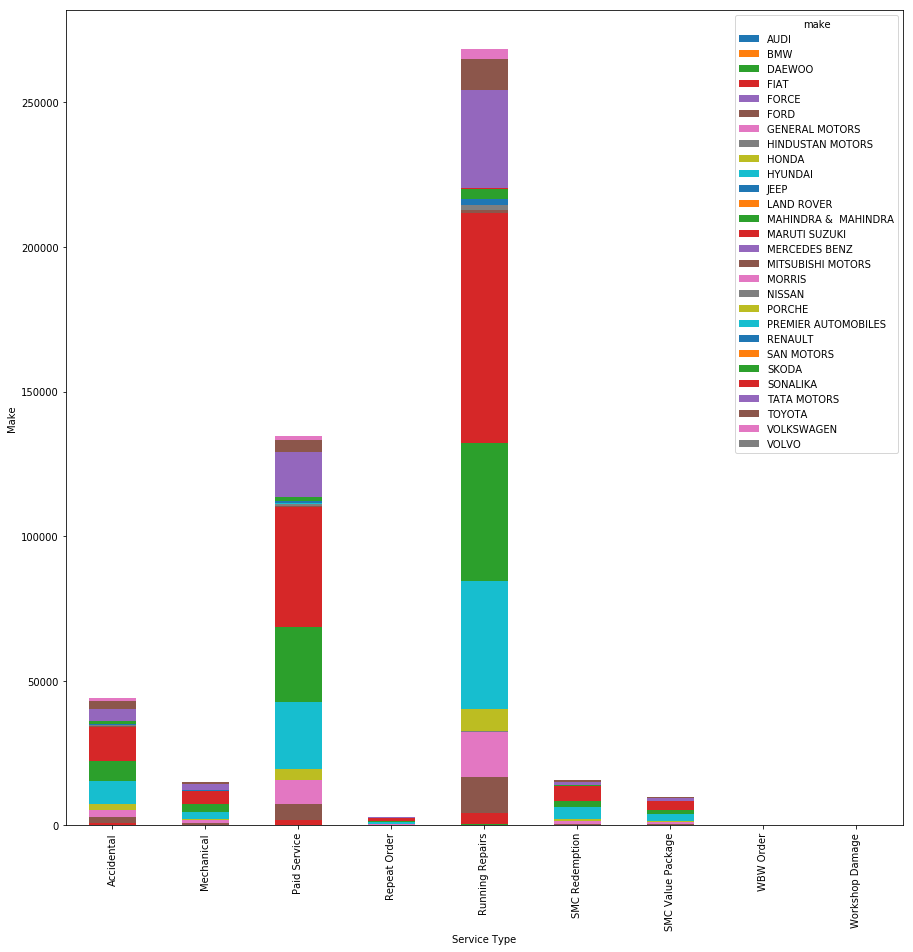

In [57]:
#What is service structure for particular make/car?
res = Final_invoice.groupby(['order_type','make']).size().unstack()

res.plot(kind='bar', stacked=True, figsize=(15,15))
plt.xlabel('Service Type')
plt.ylabel('Make')

plt.show()

In [58]:
service_revenue = Final_invoice.groupby(['order_type'])['total_value'].mean().to_frame()

In [59]:
service_revenue.reset_index()

,order_type,total_value
0,Accidental,17108.768964
1,Mechanical,3140.646793
2,Paid Service,4777.646955
3,Repeat Order,1.328935
4,Running Repairs,2517.014700
5,SMC Redemption,105.455189
6,SMC Value Package,3587.527917
7,WBW Order,7722.238235
8,Workshop Damage,0.000000


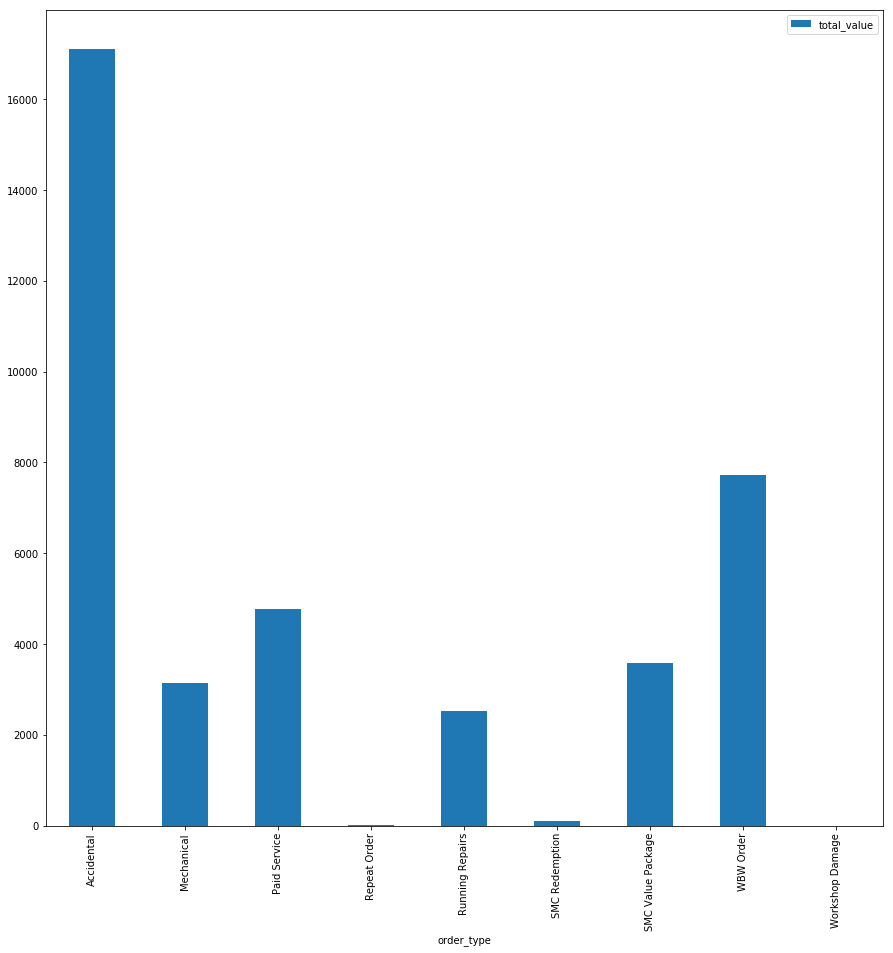

In [60]:
service_revenue.plot(kind='bar', figsize=(15,15))

In [61]:
Final_invoice['invoice_date'] = pd.to_datetime(Final_invoice['invoice_date'])

In [62]:
start_day = Final_invoice.invoice_date.iloc[0]
end_day = Final_invoice.invoice_date.iloc[-1]

In [66]:
Final_invoice.total_value.mean()

4395.026011721991

In [68]:
JTD.rename(columns={'dbm_order':'job_card_no'},inplace=True)

In [69]:
order_counts = pd.merge(JTD, Final_invoice, how= 'inner' ,on='job_card_no')

In [70]:
JTD.shape, Final_invoice.shape

((5567855, 8), (490773, 30))

In [71]:
order_counts.shape

(3058846, 37)

In [72]:
JTD.columns

Index(['job_card_no', 'order_item', 'material', 'description', 'item_category',
       'order_quantity', 'target_quantity_uom', 'net_value'],
      dtype='object')

In [73]:
order_counts.target_quantity_uom.value_counts()

EA     1489274
MIN    1302753
L       266819
Name: target_quantity_uom, dtype: int64

In [74]:
ods = order_counts.groupby(['order_item','order_type']).size().unstack()

In [76]:
service_types = Final_invoice.order_type.unique()

In [77]:
Final_invoice.total_value.max()

648203.49

In [83]:
Cust_data = pd.read_excel('Customer_Data.xlsx')

In [84]:
Cust_data.shape

(555338, 9)

In [85]:
Cust_data.isnull().sum()

Business Partner         0
Customer No.             0
Partner Type            78
Data Origin            136
Title                46307
Marital Status      539301
Occupation          540780
Date of Birth       541894
Death date          554675
dtype: int64

In [86]:
Cust_data.drop(columns=['Marital Status','Occupation','Date of Birth','Death date'],axis=1,inplace=True)

In [87]:
Cust_data.dropna(inplace=True)

In [88]:
Cust_data.columns = Cust_data.columns.str.replace(' ', '_')

In [89]:
Cust_data.columns = map(str.lower, Cust_data.columns)

In [90]:
Cust_data.isnull().sum()

business_partner    0
customer_no.        0
partner_type        0
data_origin         0
title               0
dtype: int64

In [91]:
Cust_data.rename(columns = {'customer_no.':'customer_no'}, inplace = True)

In [92]:
Cust_data.shape

(509025, 5)

In [93]:
Final_invoice.shape

(490773, 30)

In [94]:
cust_invoice = pd.merge(Cust_data,Final_invoice,how='inner',on='customer_no')

In [95]:
cust_invoice.shape

(2257, 34)

In [108]:
Plant_Master = pd.read_excel('Plant_Master.xlsx')

In [110]:
Plant_Master.shape

(438, 13)

In [111]:
Cust_data_2 = pd.read_excel('Customer_Data.xlsx',sheet_name="Sheet2")

In [113]:
Plant_Master.columns = Plant_Master.columns.str.replace(' ', '_')

In [114]:
Plant_Master.columns = map(str.lower, Plant_Master.columns)

In [115]:
Plant_Master.isnull().sum()

plant                        0
name_1                       0
valuation_area               0
customer_no._-_plant         0
vendor_number_plant        436
factory_calendar             0
name_2                       2
house_number_and_street      2
po_box                       1
postal_code                  0
city                         0
sales_organization           5
state                        0
dtype: int64

In [116]:
Plant_Master.shape

(438, 13)

In [117]:
Plant_Master["state"].value_counts() # Number of Service points per State

Rajasthan            52
Maharashtra          48
Tamil Nadu           47
Uttar Pradesh        46
Madhya Pradesh       35
Karnataka            31
Bihar                21
Haryana              20
Punjab               16
Andhra Pradesh       15
West Bengal          14
Gujarat              13
Telangana            13
Odisha               13
Jharkhand            12
Uttarakhand           9
Assam                 7
Kerala                6
Himachal Pradesh      5
Chhattisgarh          5
Puducherry            3
Jammu and Kashmir     2
Manipur               1
Chandigarh            1
Nagaland              1
Delhi                 1
Goa                   1
Name: state, dtype: int64

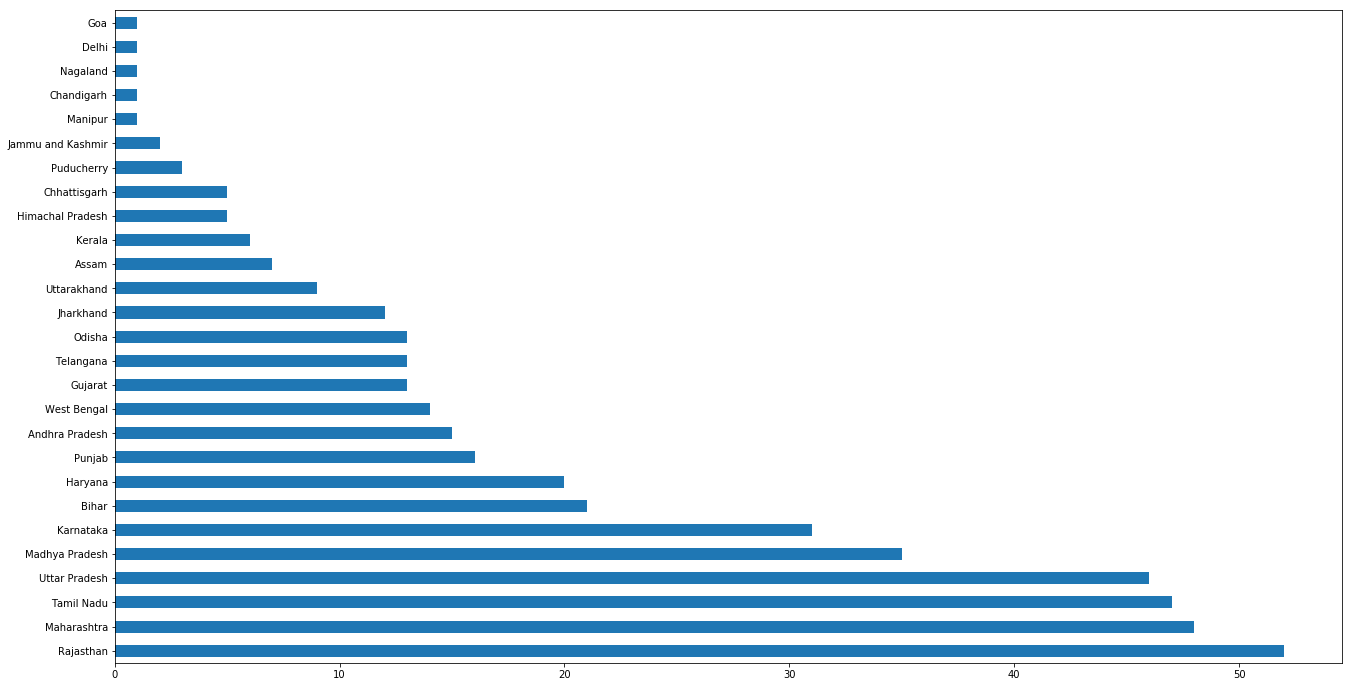

In [119]:
Plant_Master["state"].value_counts().plot(kind='barh',figsize=(22,12))

In [120]:
plant_cols = Plant_Master.columns

In [121]:
plant_cols

Index(['plant', 'name_1', 'valuation_area', 'customer_no._-_plant',
       'vendor_number_plant', 'factory_calendar', 'name_2',
       'house_number_and_street', 'po_box', 'postal_code', 'city',
       'sales_organization', 'state'],
      dtype='object')

In [123]:
state_names = list(Plant_Master["state"].unique())

In [124]:
state_names

['Tamil Nadu',
 'Punjab',
 'Maharashtra',
 'Uttar Pradesh',
 'Karnataka',
 'Puducherry',
 'Andhra Pradesh',
 'Chhattisgarh',
 'Haryana',
 'Madhya Pradesh',
 'Uttarakhand',
 'Kerala',
 'Telangana',
 'Himachal Pradesh',
 'Rajasthan',
 'Bihar',
 'Chandigarh',
 'West Bengal',
 'Odisha',
 'Gujarat',
 'Goa',
 'Jharkhand',
 'Assam',
 'Manipur',
 'Jammu and Kashmir',
 'Nagaland',
 'Delhi']

In [125]:
Plants_counts = pd.merge(Plant_Master, Final_invoice, how ='inner', on ='plant')

In [128]:
make_df = pd.DataFrame()
for state in state_names:
   
    make_df_tmp = pd.DataFrame({"state":state,"count":Plants_counts['make'][Plants_counts.state==state].value_counts()} )
    
    
    make_df_tmp.reset_index(level=0, inplace=True)
    make_df_tmp.rename(columns={"index":"make"},inplace=True)
    
    make_df = make_df.append(make_df_tmp)

make_df.reset_index(drop=True)

,make,state,count
0,MARUTI SUZUKI,Tamil Nadu,21218
1,MAHINDRA & MAHINDRA,Tamil Nadu,18813
2,HYUNDAI,Tamil Nadu,14722
3,TATA MOTORS,Tamil Nadu,13981
4,FORD,Tamil Nadu,5656
5,GENERAL MOTORS,Tamil Nadu,4651
6,TOYOTA,Tamil Nadu,3673
7,HONDA,Tamil Nadu,2270
8,VOLKSWAGEN,Tamil Nadu,1261
9,SKODA,Tamil Nadu,1225


In [129]:
make_df.columns

Index(['make', 'state', 'count'], dtype='object')

Car Make count for Tamil Nadu


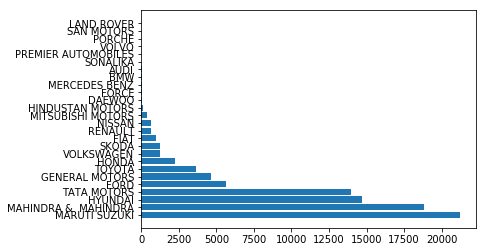

Car Make count for Punjab


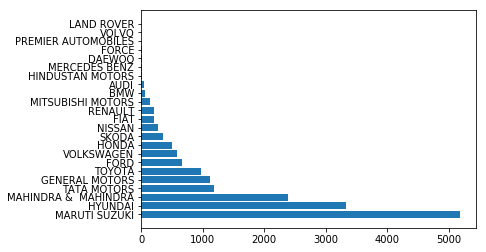

Car Make count for Maharashtra


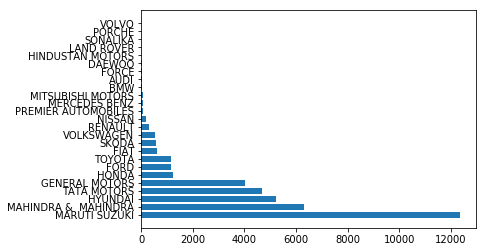

Car Make count for Uttar Pradesh


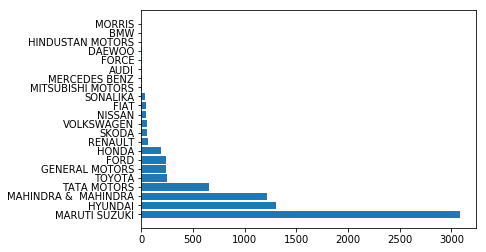

Car Make count for Karnataka


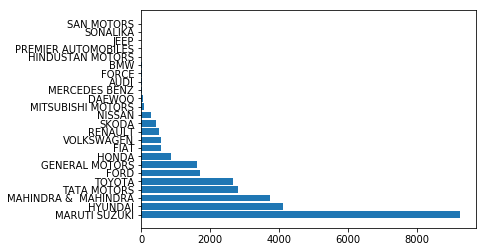

Car Make count for Puducherry


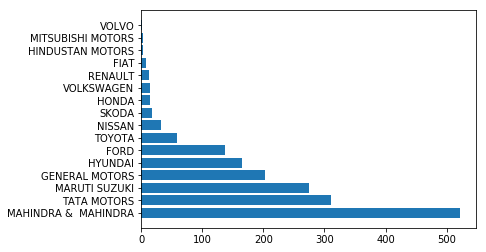

Car Make count for Andhra Pradesh


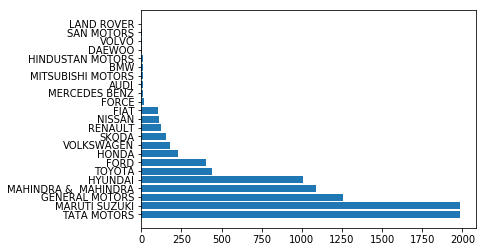

Car Make count for Chhattisgarh


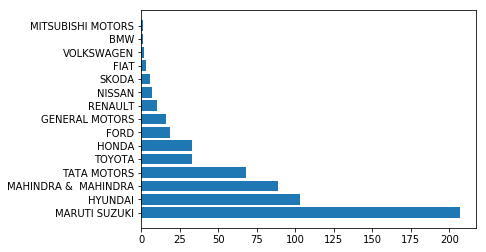

Car Make count for Haryana


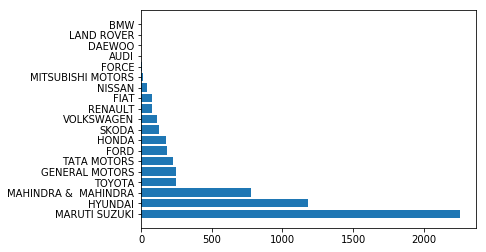

Car Make count for Madhya Pradesh


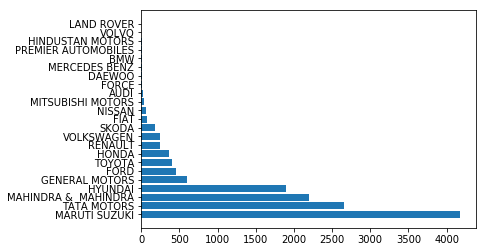

Car Make count for Uttarakhand


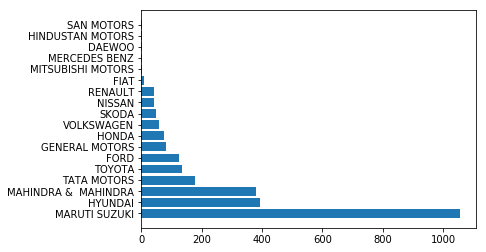

Car Make count for Kerala


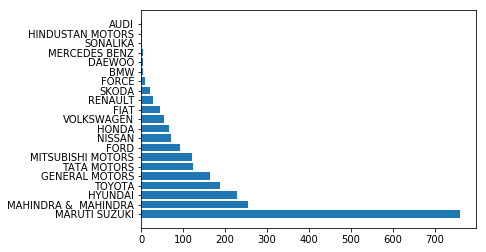

Car Make count for Telangana


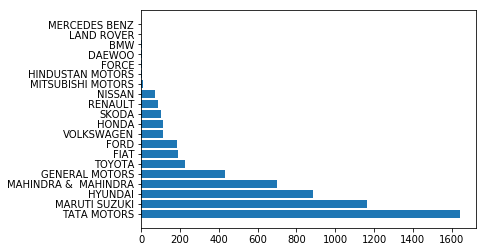

Car Make count for Himachal Pradesh


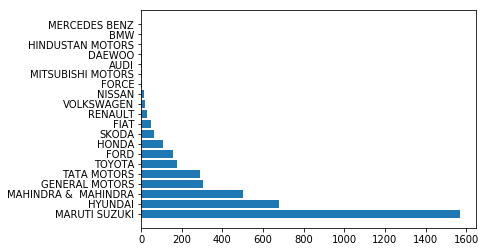

Car Make count for Rajasthan


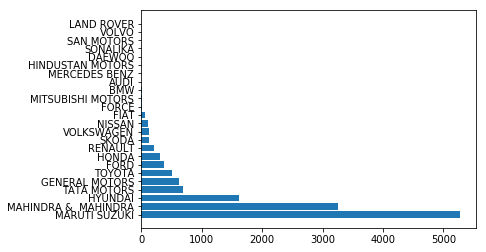

Car Make count for Bihar


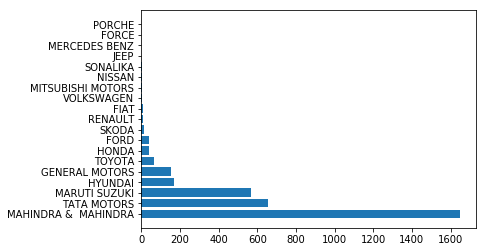

Car Make count for Chandigarh


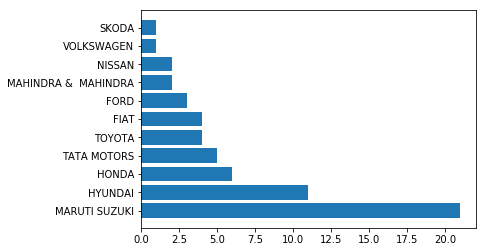

Car Make count for West Bengal


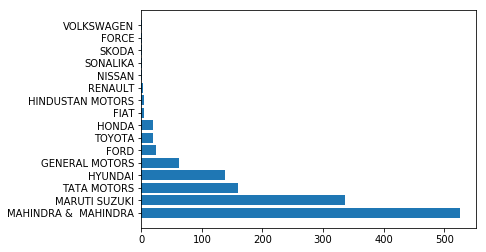

Car Make count for Odisha


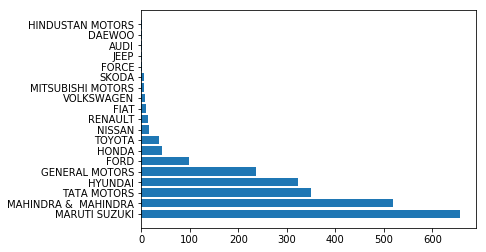

Car Make count for Gujarat


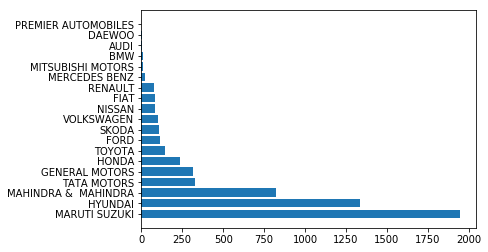

Car Make count for Goa


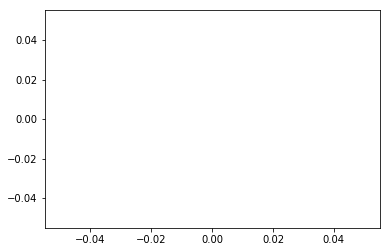

Car Make count for Jharkhand


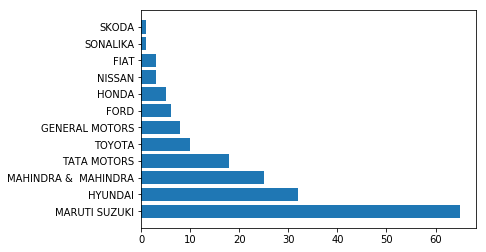

Car Make count for Assam


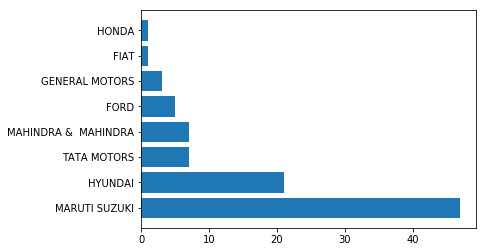

Car Make count for Manipur


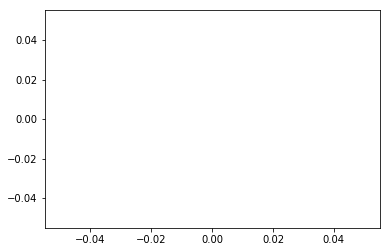

Car Make count for Jammu and Kashmir


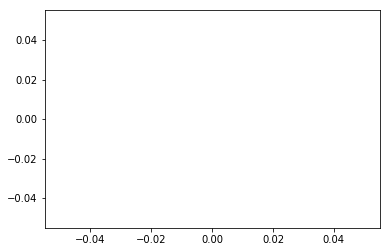

Car Make count for Nagaland


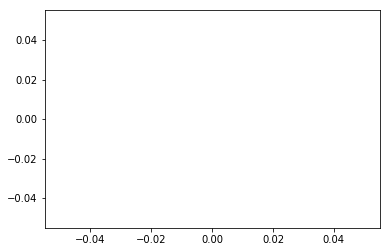

Car Make count for Delhi


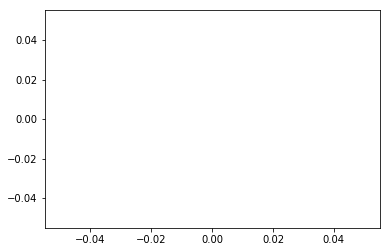

In [130]:
for state in state_names:
    make_names = list(make_df[make_df['state']==state]['make'])
    plt.barh(make_names,make_df[make_df['state']==state]['count'])
    print("Car Make count for",state)
    
    plt.show()

In [213]:
service_df = pd.DataFrame()
for state in state_names:
    
    service_df_tmp = pd.DataFrame({"state":state,"count":Plants_counts['order_type'][Plants_counts.state==state].value_counts()} )
    
    
    service_df_tmp.reset_index(level=0, inplace=True)
    service_df_tmp.rename(columns={"index":"service_type"},inplace=True)
   
    service_df = service_df.append(service_df_tmp)

service_df.reset_index(drop=True)

,service_type,state,count
0,Running Repairs,Tamil Nadu,56731
1,Paid Service,Tamil Nadu,20359
2,Accidental,Tamil Nadu,8033
3,Mechanical,Tamil Nadu,4001
4,SMC Redemption,Tamil Nadu,786
5,SMC Value Package,Tamil Nadu,596
6,Repeat Order,Tamil Nadu,83
7,Running Repairs,Punjab,8692
8,Paid Service,Punjab,4458
9,Accidental,Punjab,2219


Service order type wise count for  Tamil Nadu


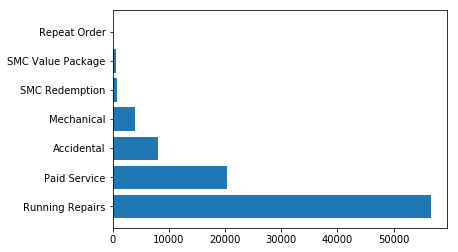

Service order type wise count for  Punjab


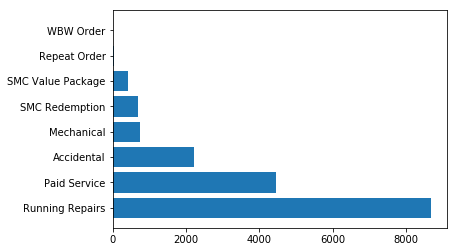

Service order type wise count for  Maharashtra


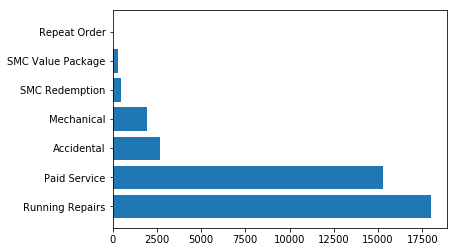

Service order type wise count for  Uttar Pradesh


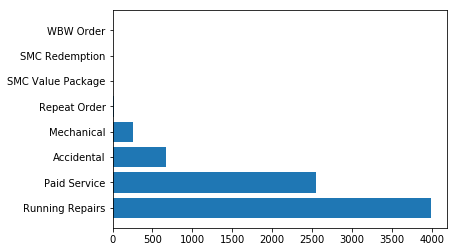

Service order type wise count for  Karnataka


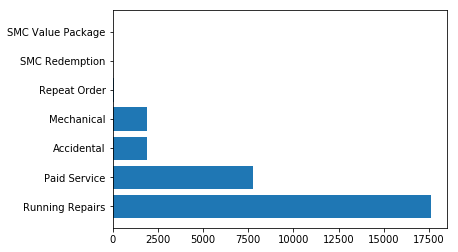

Service order type wise count for  Puducherry


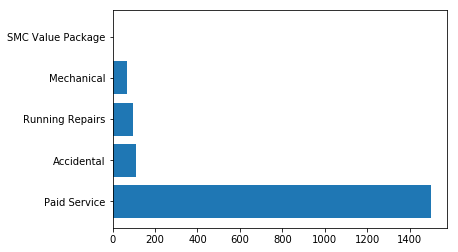

Service order type wise count for  Andhra Pradesh


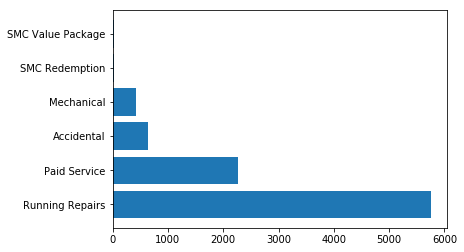

Service order type wise count for  Chhattisgarh


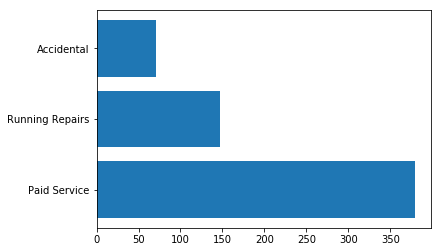

Service order type wise count for  Haryana


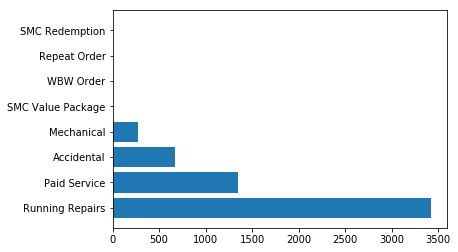

Service order type wise count for  Madhya Pradesh


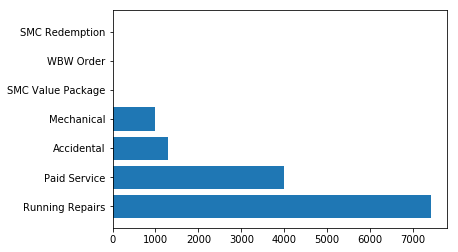

Service order type wise count for  Uttarakhand


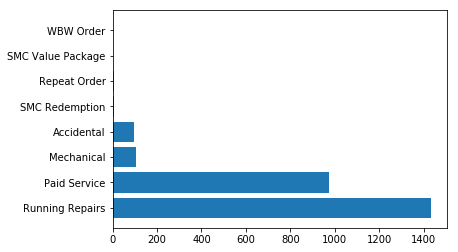

Service order type wise count for  Kerala


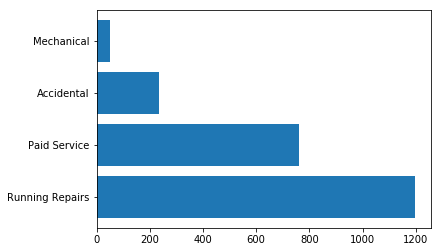

Service order type wise count for  Telangana


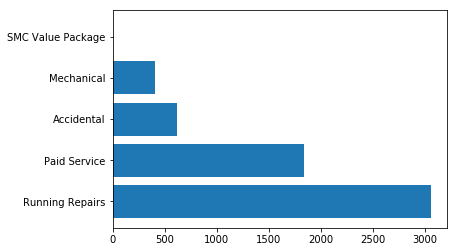

Service order type wise count for  Himachal Pradesh


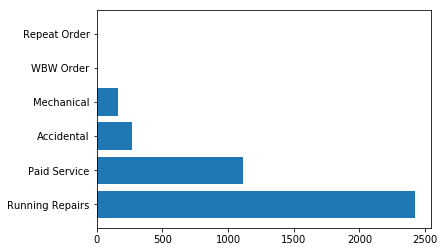

Service order type wise count for  Rajasthan


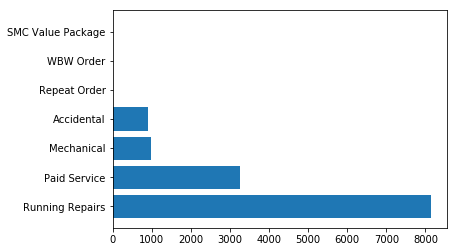

Service order type wise count for  Bihar


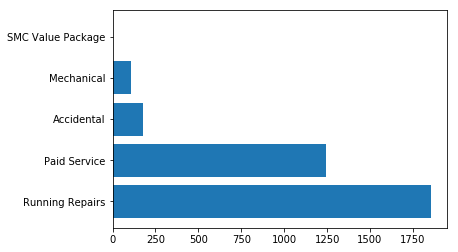

Service order type wise count for  Chandigarh


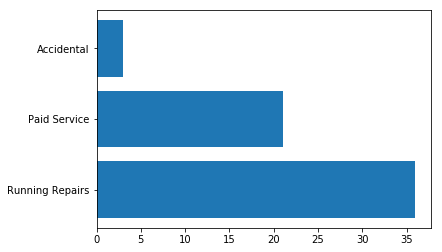

Service order type wise count for  West Bengal


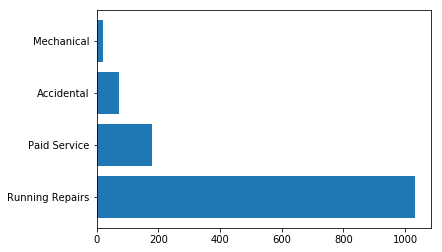

Service order type wise count for  Odisha


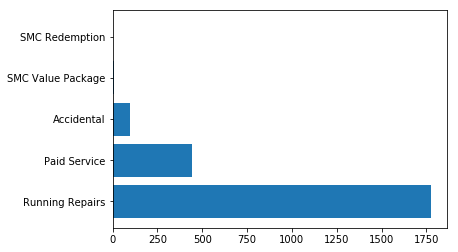

Service order type wise count for  Gujarat


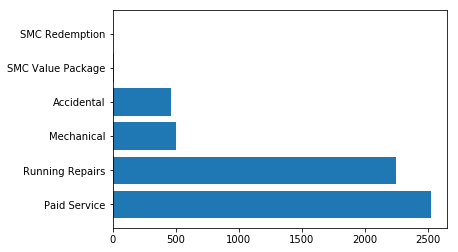

Service order type wise count for  Goa


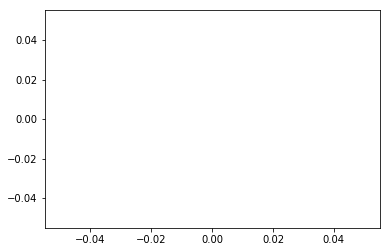

Service order type wise count for  Jharkhand


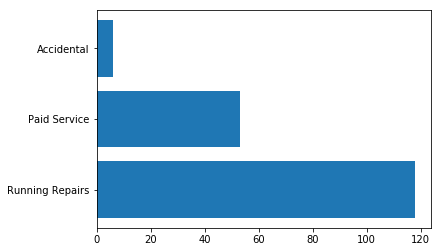

Service order type wise count for  Assam


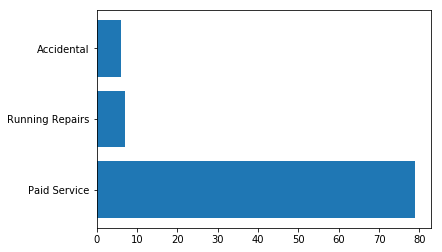

Service order type wise count for  Manipur


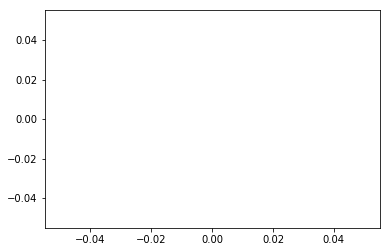

Service order type wise count for  Jammu and Kashmir


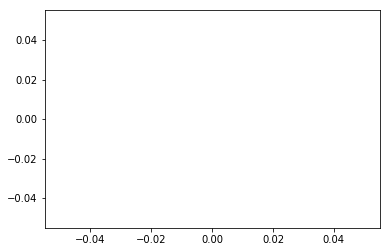

Service order type wise count for  Nagaland


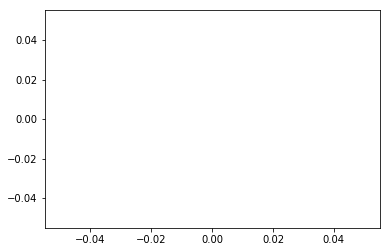

Service order type wise count for  Delhi


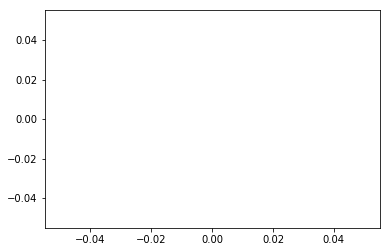

In [217]:
for state in state_names:
    service_names = list(service_df[service_df['state']==state]['service_type'])
    plt.barh(service_names,service_df[service_df['state']==state]['count'])
    print("Service order type wise count for ",state)
    
    plt.show()

<BarContainer object of 8 artists>

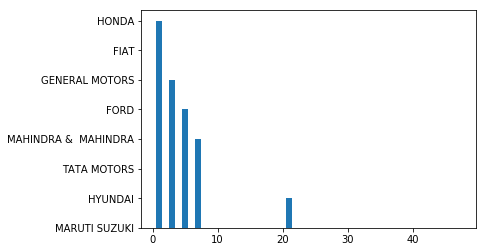

In [131]:
make_names = list(make_df[make_df['state']=="Assam"]['make'])
plt.bar(make_df[make_df['state']=="Assam"]['count'],make_names)

In [132]:
make_df[make_df['state']=="Assam"]['count'].head()

0    47
1    21
2     7
3     7
4     5
Name: count, dtype: int64

In [141]:
df_mh = Plants_counts[Plants_counts['state'] == 'Maharashtra']

In [143]:
Cust_data_2.shape

(32, 15)

In [144]:
Cust_data_2.isnull().sum()

Partner Type      24
Unnamed: 1        24
Unnamed: 2        32
Data Origin        9
Unnamed: 4         9
Unnamed: 5         9
Unnamed: 6        32
Title             27
Unnamed: 8        27
Unnamed: 9        32
Marital Status    26
Unnamed: 11       26
Unnamed: 12       32
Occupation         0
Unnamed: 14        0
dtype: int64

In [145]:
Cust_data_2.head(10).T

,0,1,2,3,4,5,6,7,8,9
Partner Type,Type,1,2,3,4,9001,9002,9003,NaN,NaN
Unnamed: 1,Description,Retail,Corporate,Fleet,Employee,Insurance Company,Surveyor,Contact Person,NaN,NaN
Unnamed: 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data Origin,Origin,Z001,Z002,Z003,Z004,Z005,Z006,Z007,Z008,Z009
Unnamed: 4,Description,Camp - Outdoor,Camp - Workshop,Emailers,Fleet,Reference - Customer,Reference - Employee,Reference - Used car dealer,Just Dial/Other helpline,Snapdeal/Other websites
Unnamed: 5,Short Name,Camp - Outdoor,Camp - Workshop,Emailers,Fleet,Ref - Customer,Ref - Employee,Used Car Dealer,Just Dial/Other,Snapdeal/Web
Unnamed: 6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,Key,1,2,3,4,NaN,NaN,NaN,NaN,NaN
Unnamed: 8,Title,Ms.,Mr.,Company,Mr. and Mrs.,NaN,NaN,NaN,NaN,NaN
Unnamed: 9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
Cust_data_2.columns = Cust_data_2.columns.str.replace(':', '_')

In [148]:
Cust_data_2.columns = Cust_data_2.columns.str.replace(' ', '_')

In [149]:
Cust_data_2.columns = map(str.lower, Cust_data_2.columns)

In [150]:
Cust_data_2.columns

Index(['partner_type', 'unnamed__1', 'unnamed__2', 'data_origin', 'unnamed__4',
       'unnamed__5', 'unnamed__6', 'title', 'unnamed__8', 'unnamed__9',
       'marital_status', 'unnamed__11', 'unnamed__12', 'occupation',
       'unnamed__14'],
      dtype='object')

In [151]:
partners = Cust_data_2[['partner_type', 'unnamed__1']]

In [153]:
partners.iloc[1:8]

,partner_type,description
1,1,Retail
2,2,Corporate
3,3,Fleet
4,4,Employee
5,9001,Insurance Company
6,9002,Surveyor
7,9003,Contact Person


In [154]:
partners = partners.iloc[1:8]

In [190]:
partners

,partner_type,description
1,1,Retail
2,2,Corporate
3,3,Fleet
4,4,Employee
5,9001,Insurance Company
6,9002,Surveyor
7,9003,Contact Person


In [157]:
Plants_counts.sales_organization.value_counts()

MFCD    157251
MFCC     45975
MFCB     27434
MFCS     19063
MFCA      1563
Name: sales_organization, dtype: int64

In [158]:
Plants_counts.columns

Index(['plant', 'name_1', 'valuation_area', 'customer_no._-_plant',
       'vendor_number_plant', 'factory_calendar', 'name_2',
       'house_number_and_street', 'po_box', 'postal_code', 'city_x',
       'sales_organization', 'state', 'area__locality', 'city_y', 'cust_type',
       'customer_no', 'district', 'invoice_date', 'invoice_no', 'job_card_no',
       'jobcard_date', 'kms_reading', 'labour_total', 'make', 'misc_total',
       'model', 'osl_total', 'order_type', 'parts_total', 'pin_code',
       'plant_name1', 'print_status', 'recovrbl_exp', 'regn_no',
       'technician_name', 'total_amt_wtd_tax', 'total_value', 'user_id',
       'job_card_date_time', 'invoice_date_time', 'service_time'],
      dtype='object')

In [199]:
Plants_counts['cust_type'].value_counts()

Retail              255205
Corporate others       154
Corporate- M&M         134
Fleets                  30
Franchise               15
MFCWL                   13
Name: cust_type, dtype: int64

<BarContainer object of 6 artists>

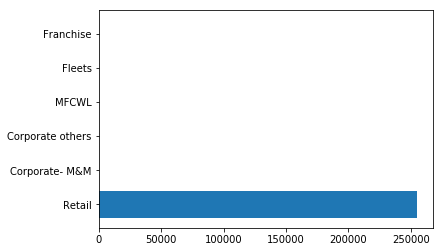

In [198]:
plt.barh(Plants_counts['cust_type'].unique(),Plants_counts['cust_type'].value_counts())

In [160]:
cust_origin = pd.DataFrame(Cust_data.data_origin.value_counts())

In [161]:
cust_origin = cust_origin.reset_index()

In [162]:
cust_origin.head(2)

,index,data_origin
0,Z005,140150
1,Z006,113793


In [163]:
cust_origin.rename(columns={'index':'data_origin','data_origin':'origin_count'},inplace=True)

In [165]:
data_origin = Cust_data_2[['data_origin', 'unnamed__4']]

In [166]:
data_origin.rename(columns={'unnamed__4':'origin_name'},inplace= True)

In [167]:
data_origin  = data_origin.iloc[1:23]

In [168]:
origin_stats = pd.merge(data_origin,cust_origin, how='inner',on='data_origin' )

In [174]:
origin_stats.sort_values("origin_count", axis = 0, ascending = False)

,data_origin,origin_name,origin_count
4,Z005,Reference - Customer,140150
5,Z006,Reference - Employee,113793
0,Z001,Camp - Outdoor,53725
3,Z004,Fleet,34997
1,Z002,Camp - Workshop,34932
18,Z019,Spotted the outlet,27344
20,Z021,Other outdoor activity,26383
17,Z018,Outdoor Sales Activity,13630
12,Z013,Hoardings/Outdoor Advertisements,13089
7,Z008,Just Dial/Other helpline,9550


Text(0, 0.5, 'Origin Channel')

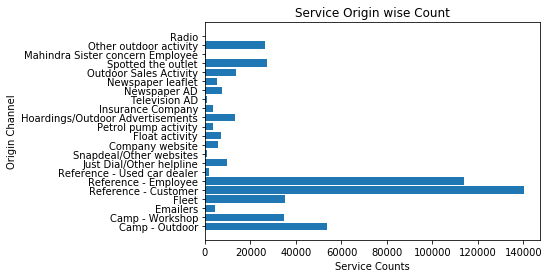

In [193]:
plt.barh(origin_stats.origin_name,origin_stats.origin_count)
plt.title('Service Origin wise Count')
plt.xlabel('Service Counts')
plt.ylabel('Origin Channel')

In [201]:
Cust_data_2[['occupation', 'unnamed__14']]

,occupation,unnamed__14
0,Occupation,Description
1,1,Director
2,2,Sr. Manager
3,3,Vice President
4,4,Assistant Vice Presi
5,5,Senior Vice Presiden
6,6,Col
7,7,Lt.
8,8,Lt. Gen
9,9,Doctor


In [203]:
Cust_data.title.value_counts()

2.0    483931
1.0     25094
Name: title, dtype: int64